In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# <Step1. 탐색> 데이터의 기초 정보 살펴보기
### [drinks 데이터셋의 기본 정보]

In [2]:
drinks = pd.read_csv('../data/drinks.csv')
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [3]:
drinks.info()  # 데이터 NA 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       170 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


In [4]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [5]:
drinks.describe()  # 데이터 이상치(outlier) 확인 ex) 1, 2, 3, 4 5 -> 1, 2, 3, 4 (5 이상치, 버림) 
                   # 박스플롯: 데이터들의 전체적인 분포를 보기 위함 및 이상치 발견하기 위함.

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [6]:
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [7]:
drinks.index

RangeIndex(start=0, stop=193, step=1)

# <Step2. 인사이트 발견> : 탐색과 시각화
### [피처간의 상관관계 탐색]
##### [두 피처간의 상관계수 구하기]
###### * 여러 개의 피처들의 서로간의 상관계수를 구하기 앞서, 두 피처간의 상관계수를 구함

In [8]:
# 상관관계 구하기 위한 숫자형 데이터를 선별하고 변수 cols에 넣음
# object 타입은 연결할 수 없음
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']

In [9]:
corr = drinks[cols].corr(method='pearson')  # 상관지수구하기, 피어슨상관!

In [10]:
corr  # -1 ~ 1사이의 2차원 데이터

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


In [11]:
# 맥주의 소비량 총 알콜소비량과 상관이 높다.
# 와인을 많이 마시는 사람들이 반드시 맥주를 많이 마시는 것은 아니지만,
# 완전히 상관이 없다고 볼 수는 없다.
# 스프라이트 소비는 와인보다는 맥주 소비와 조금 더 상관이 있다.

In [12]:
# 항목간의 상관 관계를 알 수 있는 방법 3가지
# 1. corr함수를 이용(피어슨)
# 2. heatmap 그래프
# 3. pairplot 그래프

In [13]:
import seaborn as sns

In [14]:
cols_view = ['beer', 'spirit', 'wine', 'total']

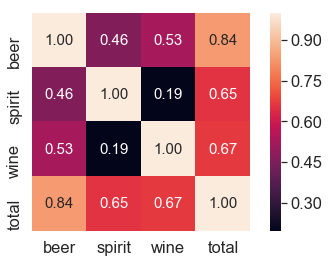

In [15]:
# corr 행렬 히트맵 시각화
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,  # corr 변수에서 값만 가져옴
            cbar=True,   # 오른쪽 바
            annot=True,  # 숫자 표출
            square=True, # 사각형 표출 
            fmt='.2f',   # 소수점 두 자리 까지
            annot_kws={'size': 15},  # 숫자 크기
            yticklabels=cols_view,  # x축 라벨 설정 
            xticklabels=cols_view)  # y축 라벨 설정

plt.tight_layout()  # 표 여백 조절해줌
plt.show()

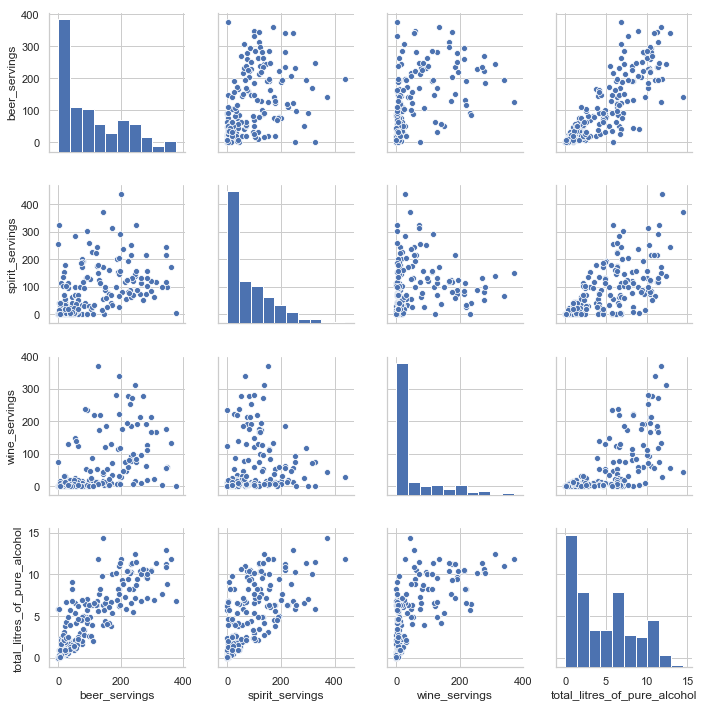

In [16]:
# 시각화 라이브러리를 이용한 피처간의 scatter plot을 출력
sns.set(style='whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings', 
                     'wine_servings', 'total_litres_of_pure_alcohol']], height=2.5)
plt.show()

# <Step3. 탐색적 분석> : 스무고개로 분석하는 개념적 탐색
#### [결측 데이터 전처리]
##### * continent column에 대한 결측 데이터 처리 과정

In [17]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       170 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


In [18]:
drinks.isnull()  # null 값이 있는지 확인, true=null 있음 / false=null 없음

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,True
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [19]:
drinks.isnull().sum()  # null 값의 개수 확인

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [20]:
# NA(Not Available): 결측치(+ 이상치)를 모두 NA처리 함,
# NA로 모두 변경할 것을 일괄처리 할 수 있다.

In [21]:
# 결측데이터 처리: 기타 대륙으로 통합 -> 'OT'
drinks['continent'] = drinks['continent'].fillna('OT')

In [22]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


# 3. 기술(설명)적 통계 : 통계를 통해서 데이터들을 자세하게 설명

In [23]:
drinks['continent'].value_counts()  # value_counts() : 그룹별 count

AF    53
EU    45
AS    44
OT    23
OC    16
SA    12
Name: continent, dtype: int64

In [24]:
con_val_count = drinks['continent'].value_counts()
type(con_val_count)  # con_val_count 타입은 Series(index + values의 결합)

pandas.core.series.Series

In [25]:
con_val_count.index  # Series 타입의 con_val_count의 index

Index(['AF', 'EU', 'AS', 'OT', 'OC', 'SA'], dtype='object')

In [26]:
labels = con_val_count.index  # index, labels 변수로 저장

In [27]:
con_val_count.values  # Series 타입의 con_val_count의 values

array([53, 45, 44, 23, 16, 12], dtype=int64)

In [28]:
pie_values = con_val_count.values  # values, pie_values 변수로 저장

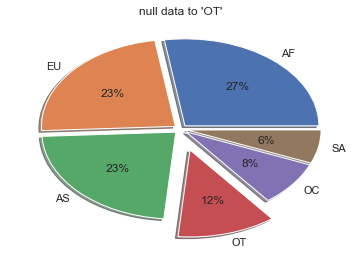

In [29]:
explode = (0.05, 0.05, 0.05, 0.25, 0.05, 0.05)

plt.pie(pie_values, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)
plt.title('null data to \'OT\'')
plt.show()

In [30]:
drinks['continent'].value_counts().index.tolist()  # list 타입으로 변경

['AF', 'EU', 'AS', 'OT', 'OC', 'SA']

In [31]:
type(drinks['continent'].value_counts().index.tolist())

list

In [32]:
drinks['continent'].value_counts().values.tolist()   # list 타입으로 변경

[53, 45, 44, 23, 16, 12]

In [33]:
type(drinks['continent'].value_counts().values.tolist())

list

# [그룹 단위의 데이터 분석 : 대륙별 분석]
##### apply, agg 함수를 이용한 대륙별 분석

In [34]:
result = drinks.groupby('continent').spirit_servings.agg(['mean','min','max','sum'])  
# agg(aggregate): 데이터 집계
#스프라이트 소비를 대륙으로 그룹화하여 평균, 최소값, 최대값, 합계를 보여줌
result

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812
SA,114.750000,25,302,1377


In [35]:
type(result)  # result 타입 확인

pandas.core.frame.DataFrame

In [36]:
result2 = drinks.groupby('continent').spirit_servings.mean()
result2

continent
AF     16.339623
AS     60.840909
EU    132.555556
OC     58.437500
OT    165.739130
SA    114.750000
Name: spirit_servings, dtype: float64

In [37]:
type(result2)  # result2의 타입 확인

pandas.core.series.Series

In [38]:
result3 = drinks.groupby('continent')['spirit_servings'].mean()  # result2와 같은 결과 다른 방식
result3

continent
AF     16.339623
AS     60.840909
EU    132.555556
OC     58.437500
OT    165.739130
SA    114.750000
Name: spirit_servings, dtype: float64

In [39]:
type(result3)  # result3의 타입 확인

pandas.core.series.Series

In [40]:
result4 = result3[result3 >= 100]  # 대륙별 증류주 평균 소비량이 100 이상인 값 검색
result4

continent
EU    132.555556
OT    165.739130
SA    114.750000
Name: spirit_servings, dtype: float64

In [41]:
result4.idxmax()  # result4의 values중에서 인덱스의 max값 리턴

'OT'

In [42]:
# 맥주 총(sum) 소비량이 제일 높은 대륙

In [43]:
beer_sum = drinks.groupby('continent')['beer_servings'].sum()
beer_sum 

continent
AF    3258
AS    1630
EU    8720
OC    1435
OT    3345
SA    2101
Name: beer_servings, dtype: int64

In [44]:
beer_sum.idxmax()

'EU'

In [45]:
beer_sum[beer_sum.values == beer_sum.max()]

continent
EU    8720
Name: beer_servings, dtype: int64

In [46]:
# 와인 최대(max) 소비량이 제일 높은 대륙

In [47]:
wine_sum = drinks.groupby('continent')['wine_servings'].max()
wine_sum 

continent
AF    233
AS    123
EU    370
OC    212
OT    100
SA    221
Name: wine_servings, dtype: int64

In [48]:
wine_sum.idxmax()

'EU'

In [49]:
wine_sum[wine_sum.values == wine_sum.max()]

continent
EU    370
Name: wine_servings, dtype: int64

In [50]:
# 맥주 평균(mean) 소비량이 제일 높은 대륙

In [51]:
beer_mean = drinks.groupby('continent')['beer_servings'].mean()
beer_mean

continent
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
OT    145.434783
SA    175.083333
Name: beer_servings, dtype: float64

In [52]:
beer_mean.idxmax()

'EU'

In [53]:
beer_mean[beer_mean.values == beer_mean.max()]

continent
EU    193.777778
Name: beer_servings, dtype: float64

##### 검색 결과에 대한 시각화

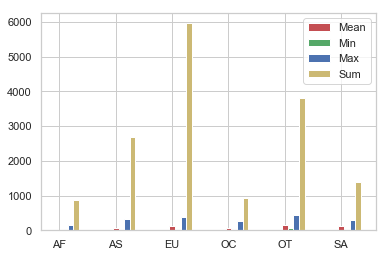

In [54]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 시각화
n_groups = len(result.index)  # result(대륙별 평균, 최소, 최대, 합계) 인덱스 길이를 n_groups 변수에 저장
means = result['mean'].tolist() 
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()
 
index = np.arange(n_groups)  # n_groups 길이만큼 array 형태로 반환
bar_width = 0.1
 
rects1 = plt.bar(index, means, bar_width,
                 color='r',
                 label='Mean')
 
rects2 = plt.bar(index + bar_width, mins, bar_width,
                 color='g',
                 label='Min')

rects3 = plt.bar(index + bar_width * 2, maxs, bar_width,
                 color='b',
                 label='Max')
 
rects3 = plt.bar(index + bar_width * 3, sums, bar_width,
                 color='y',
                 label='Sum')

plt.xticks(index, result.index.tolist())
plt.legend()  # 범례
plt.show()

In [55]:
wine_result = drinks.groupby('continent').wine_servings.agg(['mean','min','max','sum'])  
# agg(aggregate): 데이터 집계
#스프라이트 소비를 대륙으로 그룹화하여 평균, 최소값, 최대값, 합계를 보여줌
wine_result

,mean,min,max,sum
continent,,,,
AF,16.264151,0,233,862
AS,9.068182,0,123,399
EU,142.222222,0,370,6400
OC,35.625000,0,212,570
OT,24.521739,1,100,564
SA,62.416667,1,221,749


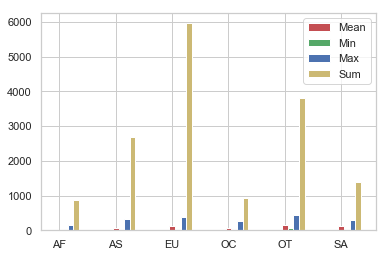

In [56]:
# 대륙별 wine_servings의 평균, 최소, 최대, 합계를 시각화
n_groups = len(wine_result.index)  # result(대륙별 평균, 최소, 최대, 합계) 인덱스 길이를 n_groups 변수에 저장
means = result['mean'].tolist() 
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()
 
index = np.arange(n_groups)  # n_groups 길이만큼 array 형태로 반환
bar_width = 0.1  # 바 그래프 사이즈
 
rects1 = plt.bar(index, means, bar_width,  # means를 인덱스 위치에 얹어서 표출
                 color='r',
                 label='Mean')
 
rects2 = plt.bar(index + bar_width, mins, bar_width,  # mins를 인덱스 위치에 첫번째 자리에 표출
                 color='g',
                 label='Min')

rects3 = plt.bar(index + bar_width * 2, maxs, bar_width,  # maxs를 인덱스 위치에 두번째 자리에 표출
                 color='b',
                 label='Max')
 
rects3 = plt.bar(index + bar_width * 3, sums, bar_width,  # sums를 인덱스 위치에 세번째 자리에 표출
                 color='y',
                 label='Sum')

plt.xticks(index, wine_result.index.tolist())  # x축에 인덱스 위치, 리스트 타입으로 변경된 wine_result 인덱스(대륙명) 표기
plt.legend()  # 범례
plt.show()

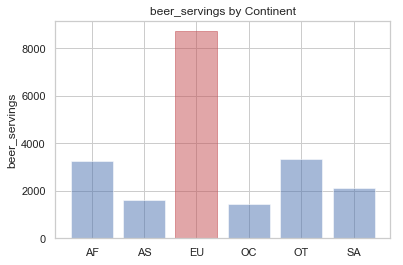

In [57]:
# 대륙별 beer_servings을 시각화
beer_group = drinks.groupby('continent')['beer_servings'].sum()  # 대륙별 맥주 총 소비량 그룹화
continents = beer_group.index.tolist()  # beer_group의 인덱스를 리스트 형태로 캐스팅 후 continents 변수에 저장
y_pos = np.arange(len(continents))  # continents 길이만큼 array 형태로 캐스팅하여 y_pos 변수에 저장
alcohol = beer_group.tolist()  # beer_group 대륙별 맥주 총 소비량 값을 리스트로 캐스팅 
 
bar_list = plt.bar(y_pos, alcohol, align='center', alpha=0.5)  
# array 배열의 수 만큼 바 생성, 값은 alcohol 변수 값(대륙별 맥주 총 소비량), 가운데 정렬, 투명도 = 0.5
bar_list[continents.index("EU")].set_color('r')  # EU는 빨간색 바로 표시
plt.xticks(y_pos, continents)  # x축, array 배열만큼 대륙명 표기
plt.ylabel('beer_servings')  # y라벨 명기
plt.title('beer_servings by Continent')  # 타이틀 명기
 
plt.show()

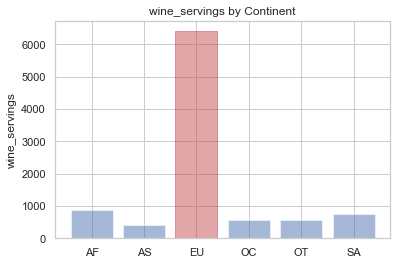

In [58]:
# 대륙별 wine_servings을 시각화
wine_group = drinks.groupby('continent')['wine_servings'].sum()  # 대륙별 와인 총 소비량 그룹화
continents = wine_group.index.tolist()  # wine_group의 인덱스를 리스트 형태로 캐스팅 후 continents 변수에 저장
y_pos = np.arange(len(continents))  # continents 길이만큼 array 형태로 캐스팅하여 y_pos 변수에 저장
alcohol = wine_group.tolist()  # wine_group 대륙별 와인 총 소비량 값을 리스트로 캐스팅 
 
bar_list = plt.bar(y_pos, alcohol, align='center', alpha=0.5)  
# array 배열의 수 만큼 바 생성, 값은 alcohol 변수 값(대륙별 와인 총 소비량), 가운데 정렬, 투명도 = 0.5
bar_list[continents.index("EU")].set_color('r')  # EU는 빨간색 바로 표시
plt.xticks(y_pos, continents)  # x축, array 배열만큼 대륙명 표기
plt.ylabel('wine_servings')  # y라벨 명기
plt.title('wine_servings by Continent')  # 타이틀 명기
 
plt.show()

In [59]:
# 나라별 전체알코올소비량 대비 맥주소비량을 구해보세요
drinks['beer_rates'] = drinks['beer_servings'] / drinks['total_litres_of_pure_alcohol']
drinks['beer_rates']

0            NaN
1      18.163265
2      35.714286
3      19.758065
4      36.779661
5      20.816327
6      23.253012
7       5.526316
8      25.096154
9      28.762887
10     16.153846
11     19.365079
12     21.000000
13           NaN
14     22.698413
15      9.861111
16     28.095238
17     38.676471
18     30.909091
19     57.500000
20     43.947368
21     16.521739
22     32.037037
23     34.027778
24     51.666667
25     22.427184
26      5.813953
27     13.968254
28      9.250000
29     36.000000
         ...    
163    22.857143
164    19.148936
165    21.111111
166    18.137255
167     5.000000
168     6.666667
169    15.468750
170    27.179487
171    10.000000
172    27.692308
173    32.727273
174    30.781250
175    39.230769
176    36.428571
177     8.636364
178     6.000000
179     5.421687
180    23.146067
181     5.714286
182    21.057692
183     6.315789
184    28.620690
185    17.424242
186    10.416667
187    23.333333
188    43.246753
189    55.500000
190    60.0000

In [60]:
# 1번 문제에 대해 파생변수를 생성하여 출력
drinks['beer_rates'] = drinks['beer_servings'] + drinks['spirit_servings'] + drinks['wine_servings'] + drinks['total_litres_of_pure_alcohol']
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,beer_rates
0,Afghanistan,0,0,0,0.0,AS,0.0
1,Albania,89,132,54,4.9,EU,279.9
2,Algeria,25,0,14,0.7,AF,39.7
3,Andorra,245,138,312,12.4,EU,707.4
4,Angola,217,57,45,5.9,AF,324.9
5,Antigua & Barbuda,102,128,45,4.9,OT,279.9
6,Argentina,193,25,221,8.3,SA,447.3
7,Armenia,21,179,11,3.8,EU,214.8
8,Australia,261,72,212,10.4,OC,555.4
9,Austria,279,75,191,9.7,EU,554.7


In [61]:
# 전체 평균보다 많은 와인을 마시는 나라는 어디인가?
wine_mean = drinks['wine_servings'].mean()
wine_mean

49.45077720207254

In [62]:
wine_king = drinks[drinks['wine_servings'] > wine_mean]
wine_king['country'].values

array(['Albania', 'Andorra', 'Argentina', 'Australia', 'Austria',
       'Bahamas', 'Belgium', 'Bulgaria', 'Canada', 'Chile',
       'Cook Islands', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Equatorial Guinea', 'Estonia', 'Finland', 'France', 'Gabon',
       'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
       'Italy', 'Laos', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta',
       'Montenegro', 'Netherlands', 'New Zealand', 'Norway', 'Paraguay',
       'Poland', 'Portugal', 'Romania', 'Russian Federation', 'St. Lucia',
       'Sao Tome & Principe', 'Serbia', 'Seychelles', 'Slovakia',
       'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland',
       'Macedonia', 'United Kingdom', 'USA', 'Uruguay'], dtype=object)

In [63]:
# 전체 평균보다 많은 와인을 마시는 나라의 수는
len(wine_king)

55

In [64]:
# 전체 평균보다 많은 와인을 마시는 나라들의 평균은
wine_king.mean()

beer_servings                   204.145455
spirit_servings                 123.109091
wine_servings                   154.272727
total_litres_of_pure_alcohol      8.838182
beer_rates                      490.365455
dtype: float64

In [65]:
# 맥주 15위까지 프린트
beer_rank = drinks.sort_values('beer_servings', ascending=False)
beer_rank.head(15)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,beer_rates
117,Namibia,376,3,1,6.8,AF,386.8
45,Czech Republic,361,170,134,11.8,EU,676.8
62,Gabon,347,98,59,8.9,AF,512.9
65,Germany,346,117,175,11.3,EU,649.3
98,Lithuania,343,244,56,12.9,EU,655.9
135,Poland,343,215,56,10.9,EU,624.9
188,Venezuela,333,100,3,7.7,SA,443.7
81,Ireland,313,118,165,11.4,EU,607.4
129,Palau,306,63,23,6.9,OC,398.9
140,Romania,297,122,167,10.4,EU,596.4


In [66]:
# 맥주 랭킹에 한국 있는지 확인
beer_korea = drinks[drinks['country'] == 'South Korea']
beer_korea

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,beer_rates
138,South Korea,140,16,9,9.8,AS,174.8


In [67]:
beer_rank.reset_index(drop=False, inplace=True)
beer_rank

,index,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,beer_rates
0,117,Namibia,376,3,1,6.8,AF,386.8
1,45,Czech Republic,361,170,134,11.8,EU,676.8
2,62,Gabon,347,98,59,8.9,AF,512.9
3,65,Germany,346,117,175,11.3,EU,649.3
4,98,Lithuania,343,244,56,12.9,EU,655.9
5,135,Poland,343,215,56,10.9,EU,624.9
6,188,Venezuela,333,100,3,7.7,SA,443.7
7,81,Ireland,313,118,165,11.4,EU,607.4
8,129,Palau,306,63,23,6.9,OC,398.9
9,140,Romania,297,122,167,10.4,EU,596.4


In [68]:
# 몇 위 인지 확인
beer_korea_rank = beer_rank[beer_rank['country'] == 'South Korea']
beer_korea_rank

,index,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,beer_rates
65,138,South Korea,140,16,9,9.8,AS,174.8


In [69]:
# 함수 ()
# 리스트 인덱스 배열 []
# 튜플  {}

In [70]:
!dir

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: A871-E04B

 C:\Users\CJ\Documents\data14 디렉터리

2021-05-04  오후 05:55    <DIR>          .
2021-05-04  오후 05:55    <DIR>          ..
2021-05-04  오전 10:06    <DIR>          .ipynb_checkpoints
2021-05-04  오후 05:55           427,941 국가별음주데이터분석.ipynb
               1개 파일             427,941 바이트
               3개 디렉터리  362,393,739,264 바이트 남음


In [71]:
!pip install scipy

In [72]:
africa = drinks.loc[drinks['continent'] == 'AF']
europe = drinks.loc[drinks['continent'] == 'EU']

In [75]:
from scipy import stats

In [74]:
# africa와 europe간의 평균의 차이가 의미가 있다. 대립가설이 채택!
# 대립가설: 아프리카, 유럽간 평균의 차이가 있다.
# 영가설: 아프리카, 유럽간 평균의 차이가 없다.

In [76]:
stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])
# statistic 
# pvalue: 0.05 기준으로 기준값 보다 낮을경우 영가설 기각, 대립가설 채택

Ttest_indResult(statistic=-7.267986335644365, pvalue=9.719556422442453e-11)

In [77]:
# africa와 europe간의 평균의 차이가 의미가 있다. 대립가설이 채택
# 대립가설: 아프리카, 유랍간 평균의 차이가 있다.
# 영가설: 평균의 차이가 없다.